In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import time
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import datetime
import operator
from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')
%matplotlib inline


In [2]:
confirmed_cases=pd.read_csv("covid-19_confirmed.csv")
deaths_reported=pd.read_csv("covid-19_deaths.csv")
recovered_cases=pd.read_csv("covid-19_recovered.csv")

In [3]:
print(confirmed_cases.head())

  Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        2        3        5   
1            NaN          Japan  36.0000  138.0000        2        1        2   
2            NaN      Singapore   1.2833  103.8333        0        1        3   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  \
0        7        8        8  ...      48      50      50      50       53   
1        2        4        4  ...     420     461     502     511      581   
2        3        4        5  ...     130     138     150     150      160   
3        1        1        1  ...       1       1       1       1        1   
4        3        4        4  ...      83      93      99     117      129   

   3/11/20  3/12/20  3/13/20  3/14/20  3/15/

In [4]:
print(deaths_reported.head())

  Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        0        0        0   
1            NaN          Japan  36.0000  138.0000        0        0        0   
2            NaN      Singapore   1.2833  103.8333        0        0        0   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  \
0        0        0        0  ...       1       1       1       1        1   
1        0        0        0  ...       6       6       6      10       10   
2        0        0        0  ...       0       0       0       0        0   
3        0        0        0  ...       0       0       0       0        0   
4        0        0        0  ...       0       0       0       0        0   

   3/11/20  3/12/20  3/13/20  3/14/20  3/15/

In [5]:
print(recovered_cases.head())

  Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        0        0        0   
1            NaN          Japan  36.0000  138.0000        0        0        0   
2            NaN      Singapore   1.2833  103.8333        0        0        0   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  \
0        0        2        2  ...      31      31      31      31       33   
1        0        1        1  ...      46      76      76      76      101   
2        0        0        0  ...      78      78      78      78       78   
3        0        0        0  ...       1       1       1       1        1   
4        0        0        0  ...      22      23      24      24       24   

   3/11/20  3/12/20  3/13/20  3/14/20  3/15/

In [6]:
#making an object of the keys so that i can access it for all the csv files 
cols=confirmed_cases.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')


In [7]:
#segregated the files leaving the text and keeping just the dates
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,0,0,0,0,2,2,5,5,5,5,...,31,31,31,31,33,34,34,35,35,35
1,0,0,0,0,1,1,1,1,1,1,...,46,76,76,76,101,118,118,118,118,118
2,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dates=confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []

for i in dates:
    confirmed_sum=confirmed[i].sum()
    deaths_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    mortality_rate.append(deaths_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


In [11]:
print("THE FOLLOWING DATA IS FROM 22nd JANUARY 2020 TO 15th MARCH 2020:\n")
print("\t THE TOTAL NUMBER OF CONFIRMED CASES IN THE WORLD OF CORONA VIRUS ARE:{}".format(confirmed_sum))
print("\t THE TOTAL NUMBER OF DEATH CASES IN THE WORLD OF CORONA VIRUS ARE:{}".format(deaths_sum))
print("\t THE TOTAL NUMBER OF RECOVERED CASES IN THE WORLD OF CORONA VIRUS ARE:{}".format(recovered_sum))

THE FOLLOWING DATA IS FROM 22nd JANUARY 2020 TO 15th MARCH 2020:

	 THE TOTAL NUMBER OF CONFIRMED CASES IN THE WORLD OF CORONA VIRUS ARE:167449
	 THE TOTAL NUMBER OF DEATH CASES IN THE WORLD OF CORONA VIRUS ARE:6440
	 THE TOTAL NUMBER OF RECOVERED CASES IN THE WORLD OF CORONA VIRUS ARE:76034


In [12]:
print(recovery_rate)
mortality_rate

[0.05045045045045045, 0.045941807044410414, 0.03825717321997875, 0.027196652719665274, 0.024551463644948063, 0.020840450973693202, 0.01918250268913589, 0.020434641582873826, 0.01736701481661404, 0.0223632517376851, 0.023591958797142383, 0.028116995293977484, 0.031336451888737994, 0.03566047212456052, 0.04067305952596345, 0.04825258785735146, 0.05847460091302957, 0.07047413793103448, 0.08079701120797012, 0.09227819091716945, 0.10452658363465916, 0.11388514185887087, 0.10427710045056984, 0.12047544292442251, 0.1361002462697378, 0.15254689430529036, 0.1717628108875481, 0.1910136286201022, 0.21313079231613322, 0.23855269892515454, 0.24588990276349532, 0.29124829789129414, 0.29625783575001585, 0.3170495676653931, 0.34702100406650666, 0.3732907426746115, 0.40211953500737124, 0.4364122681883024, 0.46252223552801386, 0.48338218153424845, 0.5049719841428033, 0.5194743644980612, 0.5379520605550883, 0.549600539425022, 0.5488583667374047, 0.5514784400071819, 0.5527938430711781, 0.5503121670291737,

[0.03063063063063063,
 0.027565084226646247,
 0.02763018065887354,
 0.029288702928870293,
 0.02644003777148253,
 0.02801503245644004,
 0.023485120114736465,
 0.021569899448589037,
 0.020767549186300704,
 0.021456633423995165,
 0.021515201860774213,
 0.021564305712753917,
 0.02142749358684171,
 0.02059266700150678,
 0.020408901755020806,
 0.020573060323847227,
 0.020906632549213457,
 0.021713362068965517,
 0.0225653798256538,
 0.023689256816799963,
 0.02484264095352886,
 0.02472302691227527,
 0.022710707659687253,
 0.022770426852059506,
 0.02413443430392583,
 0.024851173761653376,
 0.02549892161948183,
 0.026711563032367974,
 0.028054310606962018,
 0.02948934997440844,
 0.029301120758106296,
 0.03128062204914799,
 0.03126701703286266,
 0.03304092097325558,
 0.03367614689167175,
 0.03403157442103323,
 0.03400439857892066,
 0.034141702330004756,
 0.03419330085686714,
 0.03390329187837364,
 0.03416162824175581,
 0.034037052994398964,
 0.0342094196804037,
 0.034204450256431214,
 0.033993554

In [13]:
days_since_22_1=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(1,-1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [14]:
days_since_22_1

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [15]:
world_cases

array([[   555,    653,    941,   1434,   2118,   2927,   5578,   6166,
          8234,   9927,  12038,  16787,  19881,  23892,  27635,  30817,
         34391,  37120,  40150,  42762,  44802,  45221,  60368,  66885,
         69030,  71224,  73258,  75136,  75639,  76197,  76823,  78579,
         78965,  79568,  80413,  81395,  82754,  84120,  86011,  88369,
         90306,  92840,  95120,  97882, 101784, 105821, 109795, 113561,
        118592, 125865, 128343, 145193, 156097, 167449]], dtype=int64)

In [16]:
total_deaths

array([[  17],
       [  18],
       [  26],
       [  42],
       [  56],
       [  82],
       [ 131],
       [ 133],
       [ 171],
       [ 213],
       [ 259],
       [ 362],
       [ 426],
       [ 492],
       [ 564],
       [ 634],
       [ 719],
       [ 806],
       [ 906],
       [1013],
       [1113],
       [1118],
       [1371],
       [1523],
       [1666],
       [1770],
       [1868],
       [2007],
       [2122],
       [2247],
       [2251],
       [2458],
       [2469],
       [2629],
       [2708],
       [2770],
       [2814],
       [2872],
       [2941],
       [2996],
       [3085],
       [3160],
       [3254],
       [3348],
       [3460],
       [3558],
       [3802],
       [3988],
       [4262],
       [4615],
       [4720],
       [5404],
       [5819],
       [6440]], dtype=int64)

In [17]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034]], dtype=int64)

In [18]:
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [19]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [20]:
start="22/01/2020"
start_date=datetime.datetime.strptime(start,'%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [21]:
future_forecast_dates

['22/01/2020',
 '23/01/2020',
 '24/01/2020',
 '25/01/2020',
 '26/01/2020',
 '27/01/2020',
 '28/01/2020',
 '29/01/2020',
 '30/01/2020',
 '31/01/2020',
 '01/02/2020',
 '02/02/2020',
 '03/02/2020',
 '04/02/2020',
 '05/02/2020',
 '06/02/2020',
 '07/02/2020',
 '08/02/2020',
 '09/02/2020',
 '10/02/2020',
 '11/02/2020',
 '12/02/2020',
 '13/02/2020',
 '14/02/2020',
 '15/02/2020',
 '16/02/2020',
 '17/02/2020',
 '18/02/2020',
 '19/02/2020',
 '20/02/2020',
 '21/02/2020',
 '22/02/2020',
 '23/02/2020',
 '24/02/2020',
 '25/02/2020',
 '26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '12/03/2020',
 '13/03/2020',
 '14/03/2020',
 '15/03/2020',
 '16/03/2020',
 '17/03/2020',
 '18/03/2020',
 '19/03/2020',
 '20/03/2020',
 '21/03/2020',
 '22/03/2020',
 '23/03/2020',
 '24/03/2020',
 '25/03/2020']

In [22]:
latest_confirmed=confirmed_cases[dates[-1]]
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [23]:
latest_deaths=deaths_reported[dates[-1]]
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [24]:
latest_recoveries=recovered_cases[dates[-1]]
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [25]:
unique_countries=list(confirmed_cases["Country/Region"].unique())
unique_countries


['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [26]:
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases["Country/Region"]==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)
    unique_countries
unique_countries=[k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [27]:
#unique_countries
#country_confirmed_cases

In [28]:
print("\t\t\t\t\t CONFIRMED CASES BY COUNTRY/REGION:")
for i in range(len(unique_countries)):
    print("{}:{} cases".format(unique_countries[i],country_confirmed_cases[i]))

					 CONFIRMED CASES BY COUNTRY/REGION:
China:81003 cases
Italy:24747 cases
Iran:13938 cases
Korea, South:8162 cases
Spain:7798 cases
Germany:5795 cases
France:4513 cases
US:3499 cases
Switzerland:2200 cases
Norway:1221 cases
United Kingdom:1144 cases
Netherlands:1135 cases
Sweden:1022 cases
Belgium:886 cases
Denmark:875 cases
Austria:860 cases
Japan:839 cases
Cruise Ship:696 cases
Malaysia:428 cases
Qatar:401 cases
Greece:331 cases
Australia:297 cases
Czechia:253 cases
Canada:252 cases
Israel:251 cases
Portugal:245 cases
Finland:244 cases
Singapore:226 cases
Slovenia:219 cases
Bahrain:214 cases
Estonia:171 cases
Iceland:171 cases
Brazil:162 cases
Philippines:140 cases
Romania:131 cases
Ireland:129 cases
Poland:119 cases
Indonesia:117 cases
Iraq:116 cases
Thailand:114 cases
India:113 cases
Kuwait:112 cases
Egypt:110 cases
Lebanon:110 cases
Saudi Arabia:103 cases
San Marino:101 cases
United Arab Emirates:98 cases
Chile:74 cases
Russia:63 cases
Luxembourg:59 cases
Taiwan*:59 cases
Vietn

In [29]:
unique_provinces =  list(confirmed_cases['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [30]:
#unique_provinces


In [31]:
province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for i in no_cases:
    unique_provinces.remove(i)
for i in range(len(unique_provinces)):
    print("{}:{} cases".format(unique_provinces[i],province_confirmed_cases[i]))

British Columbia:73 cases
New South Wales:134 cases
Victoria:57 cases
Queensland:61 cases
South Australia:20 cases
Western Australia:17 cases
Tasmania:6 cases
Northern Territory:1 cases
Ontario:104 cases
Alberta:39 cases
Quebec:24 cases
Washington:643 cases
New York:732 cases
California:426 cases
Massachusetts:164 cases
Diamond Princess:742 cases
Grand Princess:23 cases
Georgia:99 cases
Colorado:131 cases
Florida:115 cases
New Jersey:98 cases
Oregon:36 cases
Texas:72 cases
Illinois:93 cases
Pennsylvania:66 cases
Iowa:18 cases
Maryland:32 cases
North Carolina:33 cases
South Carolina:28 cases
Tennessee:39 cases
Virginia:45 cases
Arizona:13 cases
Indiana:20 cases
Kentucky:20 cases
District of Columbia:16 cases
Nevada:24 cases
New Hampshire:13 cases
Minnesota:35 cases
Nebraska:17 cases
Ohio:37 cases
Rhode Island:20 cases
Wisconsin:32 cases
Connecticut:24 cases
Hawaii:6 cases
Oklahoma:7 cases
Utah:28 cases
Kansas:8 cases
Louisiana:91 cases
Missouri:5 cases
Vermont:8 cases
Alaska:1 cases
Ark

In [32]:
nan_indices = [] 


for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

In [33]:
unique_provinces

['British Columbia',
 'New South Wales',
 'Victoria',
 'Queensland',
 'South Australia',
 'Western Australia',
 'Tasmania',
 'Northern Territory',
 'Ontario',
 'Alberta',
 'Quebec',
 'Washington',
 'New York',
 'California',
 'Massachusetts',
 'Diamond Princess',
 'Grand Princess',
 'Georgia',
 'Colorado',
 'Florida',
 'New Jersey',
 'Oregon',
 'Texas',
 'Illinois',
 'Pennsylvania',
 'Iowa',
 'Maryland',
 'North Carolina',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'Arizona',
 'Indiana',
 'Kentucky',
 'District of Columbia',
 'Nevada',
 'New Hampshire',
 'Minnesota',
 'Nebraska',
 'Ohio',
 'Rhode Island',
 'Wisconsin',
 'Connecticut',
 'Hawaii',
 'Oklahoma',
 'Utah',
 'Kansas',
 'Louisiana',
 'Missouri',
 'Vermont',
 'Alaska',
 'Arkansas',
 'Delaware',
 'Idaho',
 'Maine',
 'Michigan',
 'Mississippi',
 'Montana',
 'New Mexico',
 'North Dakota',
 'South Dakota',
 'Wyoming',
 'Hubei',
 'Guangdong',
 'Henan',
 'Zhejiang',
 'Hunan',
 'Anhui',
 'Jiangxi',
 'Shandong',
 'Jiangsu',
 'Chong

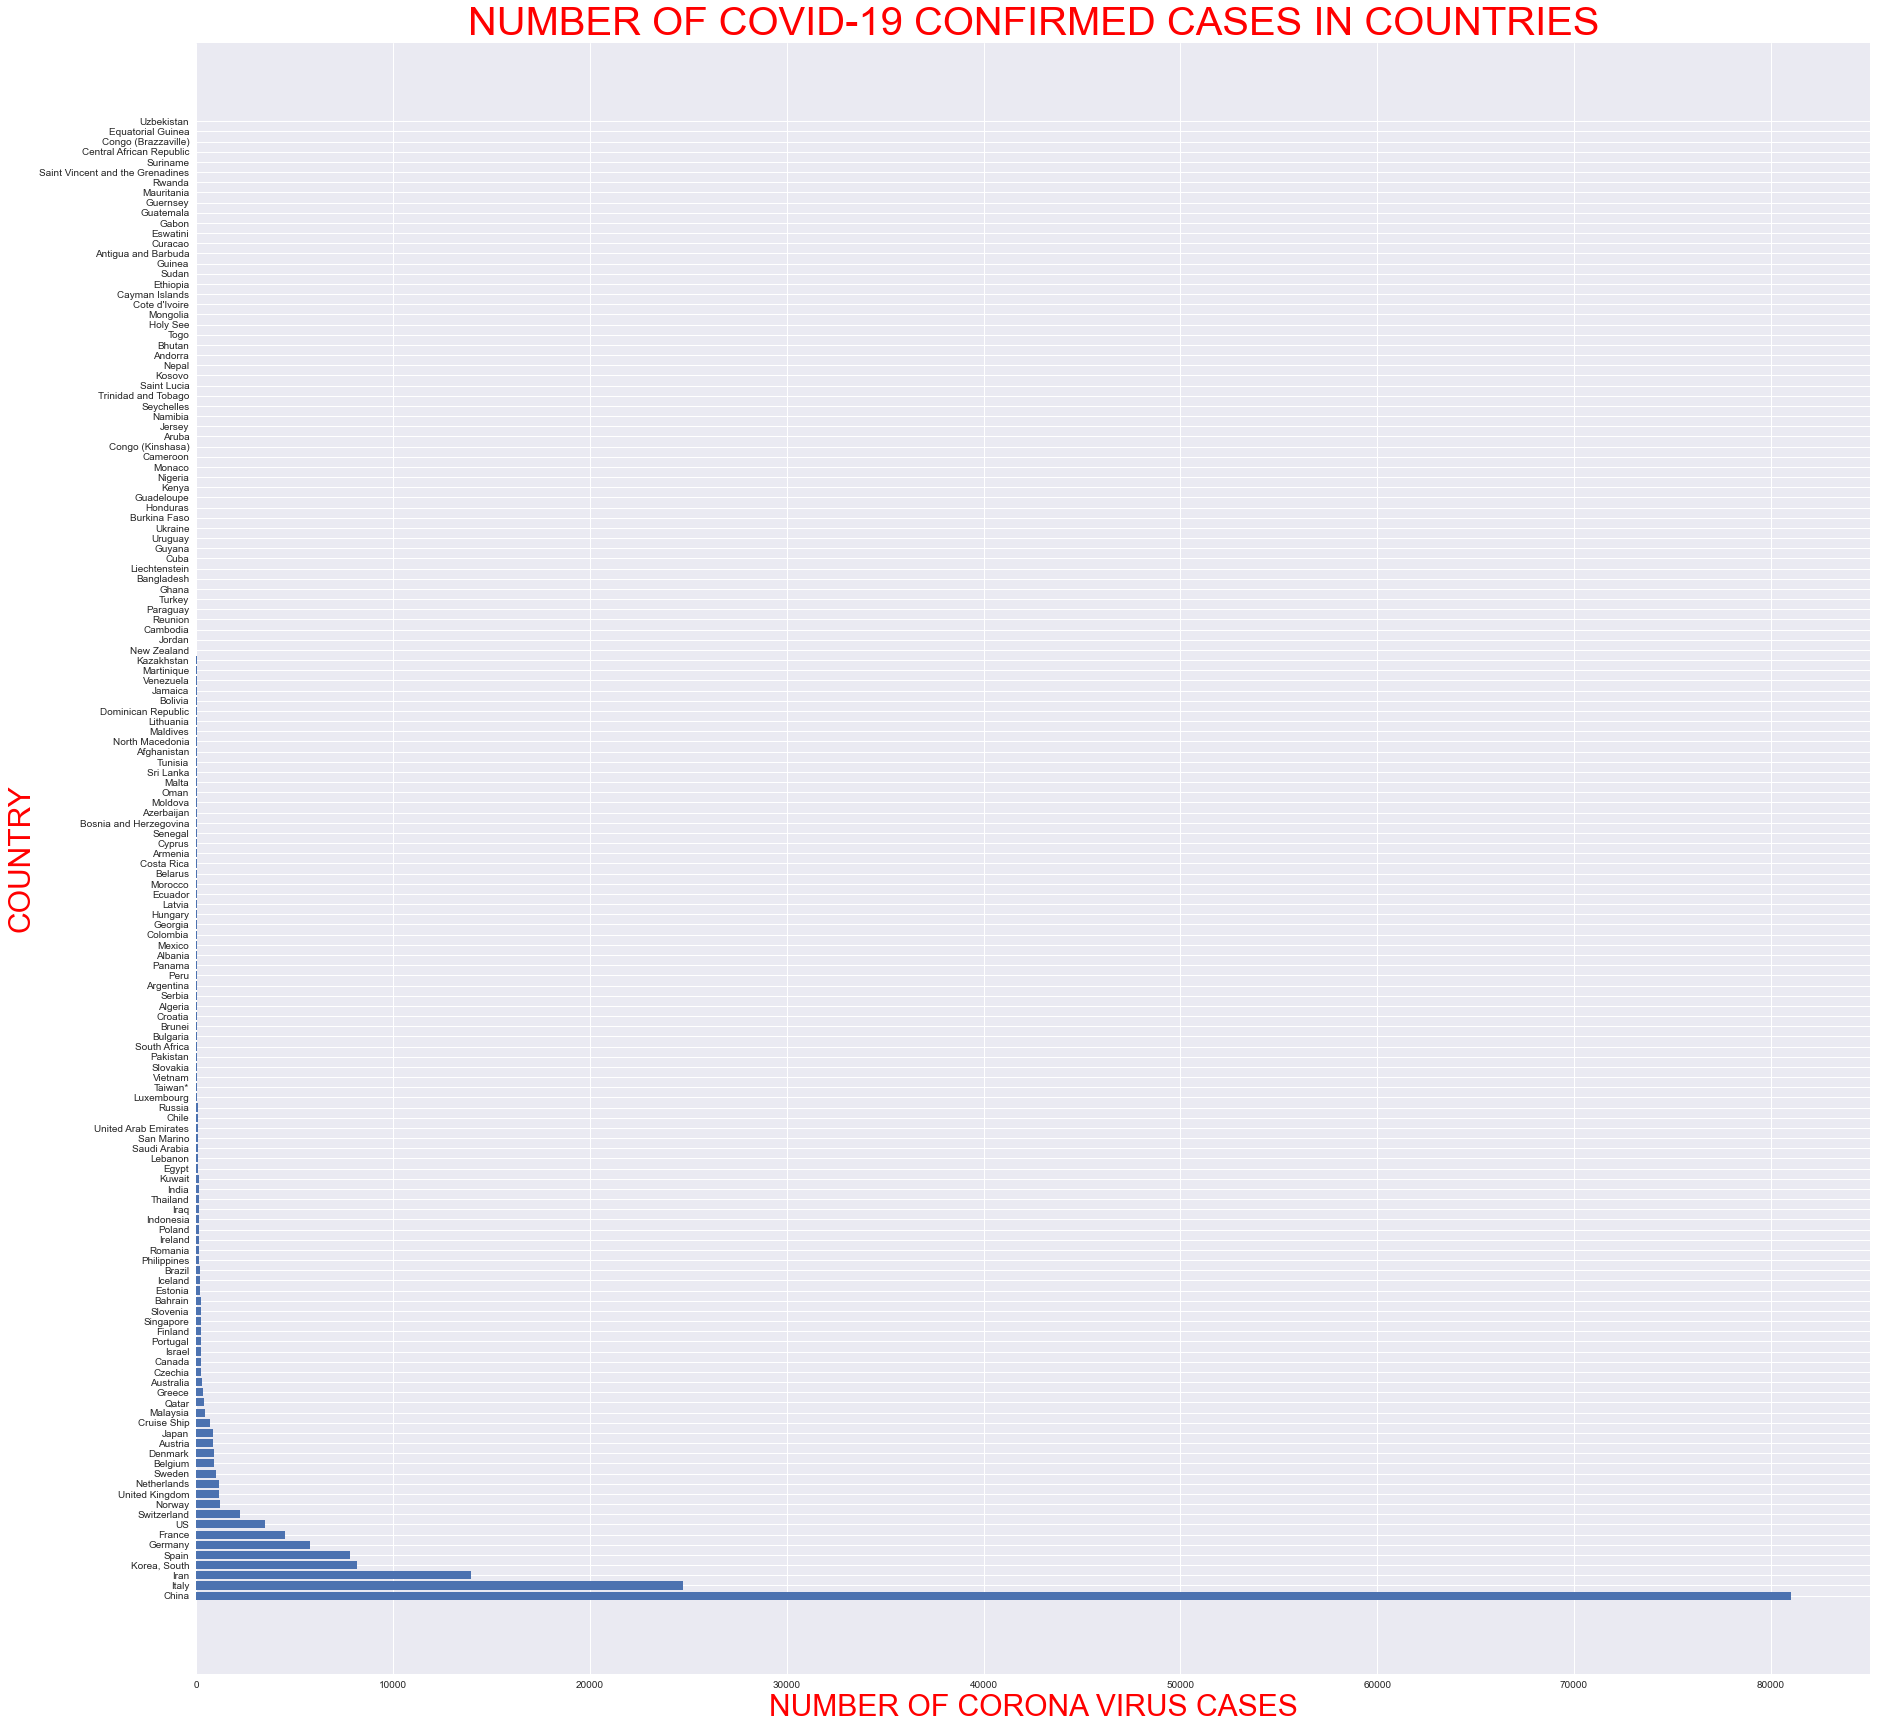

In [34]:
#plots

plt.figure(figsize=(30,30))
plt.barh(unique_countries,country_confirmed_cases)
plt.title("NUMBER OF COVID-19 CONFIRMED CASES IN COUNTRIES",fontsize=40,color="red")
plt.xlabel("NUMBER OF CORONA VIRUS CASES",fontsize=30,color="red")
plt.ylabel("COUNTRY",fontsize=30,color="red")
plt.savefig("1.confirmed_country_cases.png")

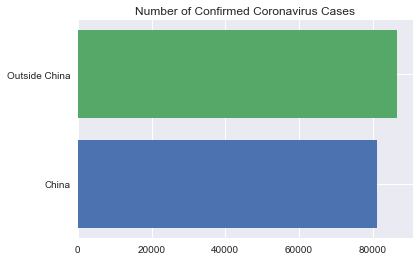

In [35]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
#plt.figure(figsize=(20, 20))
plt.barh('China', china_confirmed)
plt.barh('Outside China', outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.savefig("2.China.png")

In [36]:
print('Outside China : {}  cases'.format(outside_mainland_china_confirmed))
print('China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside China : 86446  cases
China: 81003 cases
Total: 167449 cases


In [37]:
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

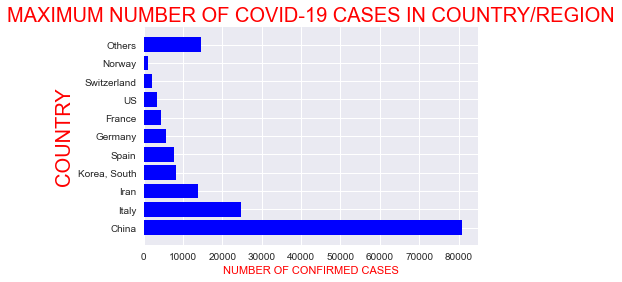

In [38]:
#plot
#plt.figure(figsize=(40,30))
plt.barh(visual_unique_countries,visual_confirmed_cases,color="blue")
plt.title("MAXIMUM NUMBER OF COVID-19 CASES IN COUNTRY/REGION",fontsize=20,color="red")
plt.xlabel("NUMBER OF CONFIRMED CASES",color="red")
plt.ylabel("COUNTRY",fontsize=20,color="red")

plt.savefig("3.max number of confirmed cases.png")


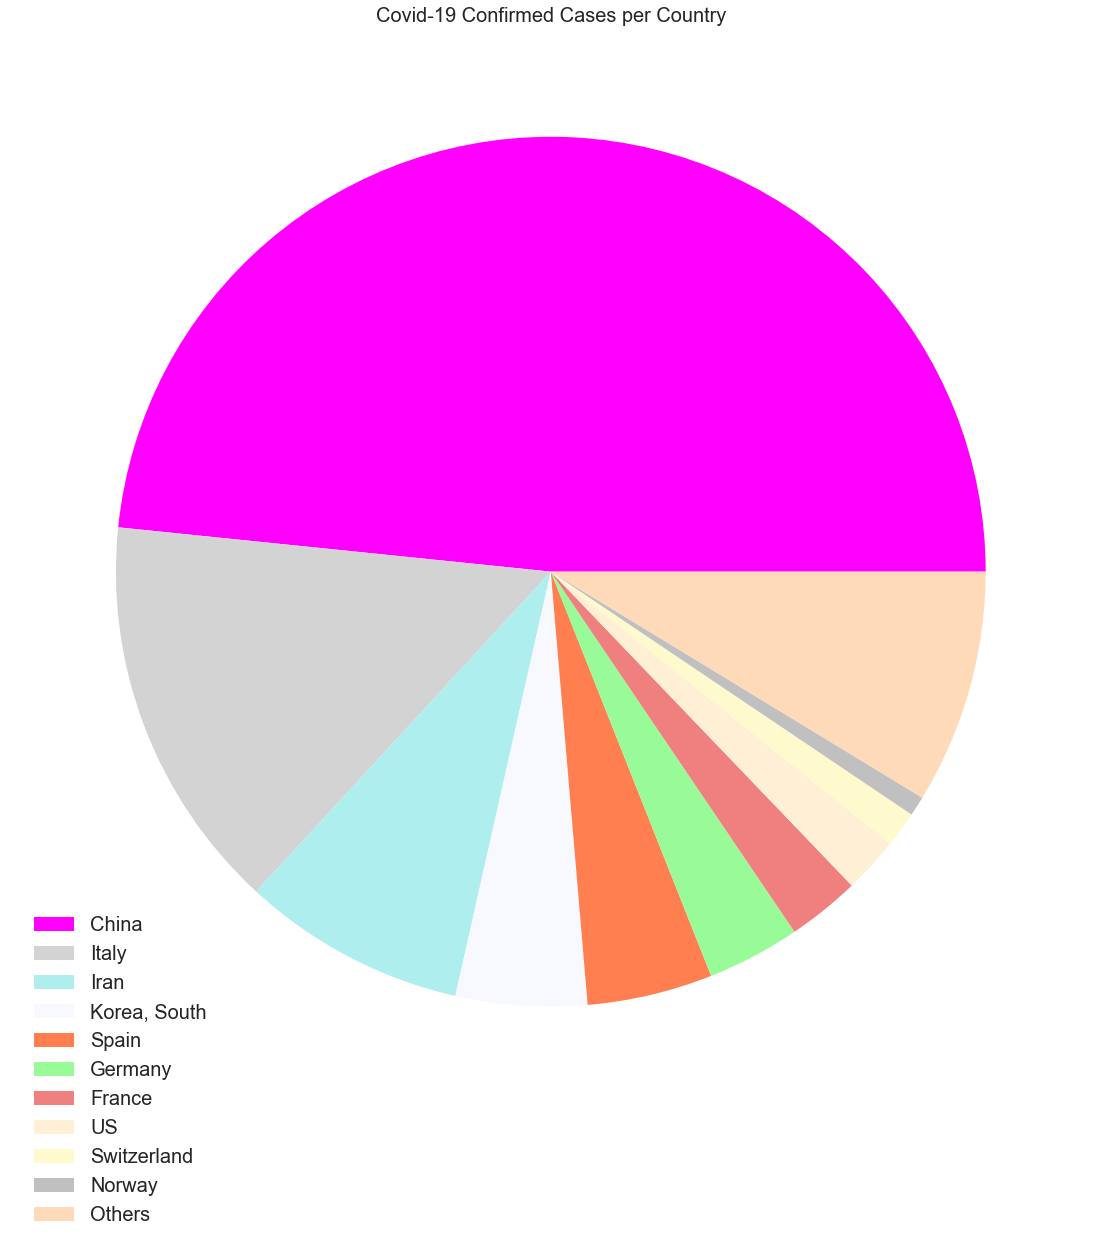

In [39]:
import matplotlib.colors as mcolors
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country',fontsize=20)
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best',fontsize=20,bbox_to_anchor=(0.2,0.2))
plt.savefig("4.piechart visualisation.png")
plt.show()


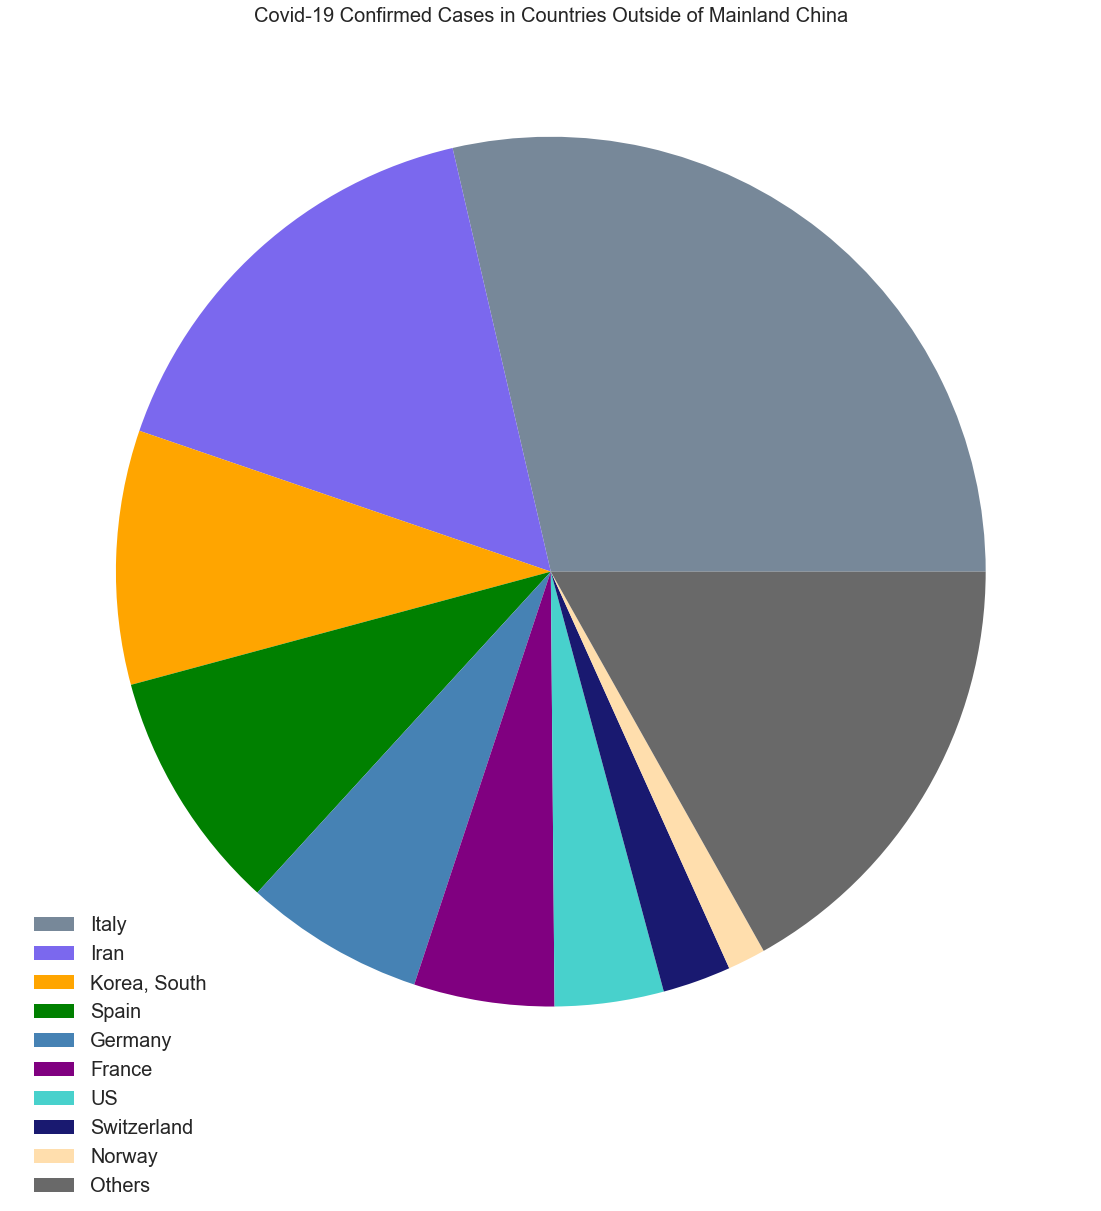

In [40]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases in Countries Outside of Mainland China',fontsize=20)
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best',fontsize=20,bbox_to_anchor=(0.2,0.2))
plt.savefig("5.piechart visualisation-china.png")
plt.show()

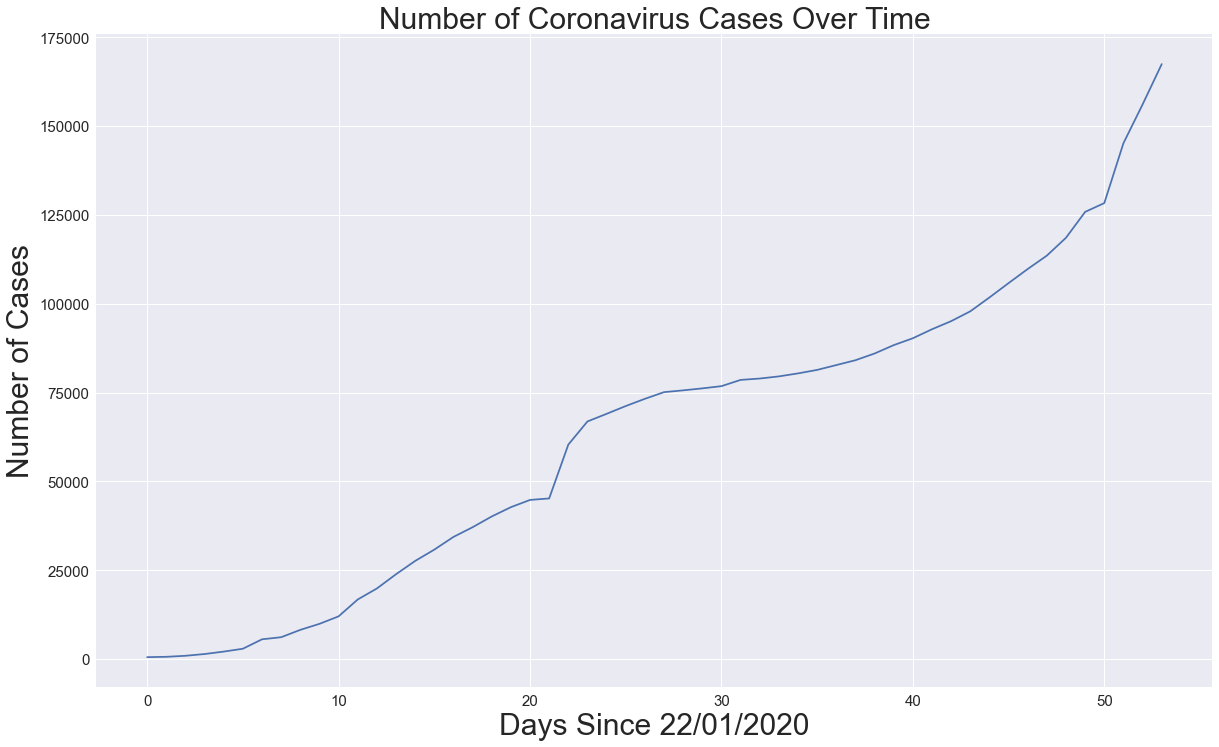

In [41]:
adjusted_dates=adjusted_dates.reshape(-1,1)
world_cases=world_cases.reshape(-1,1)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("6.total confirmed cases.png")
plt.show()

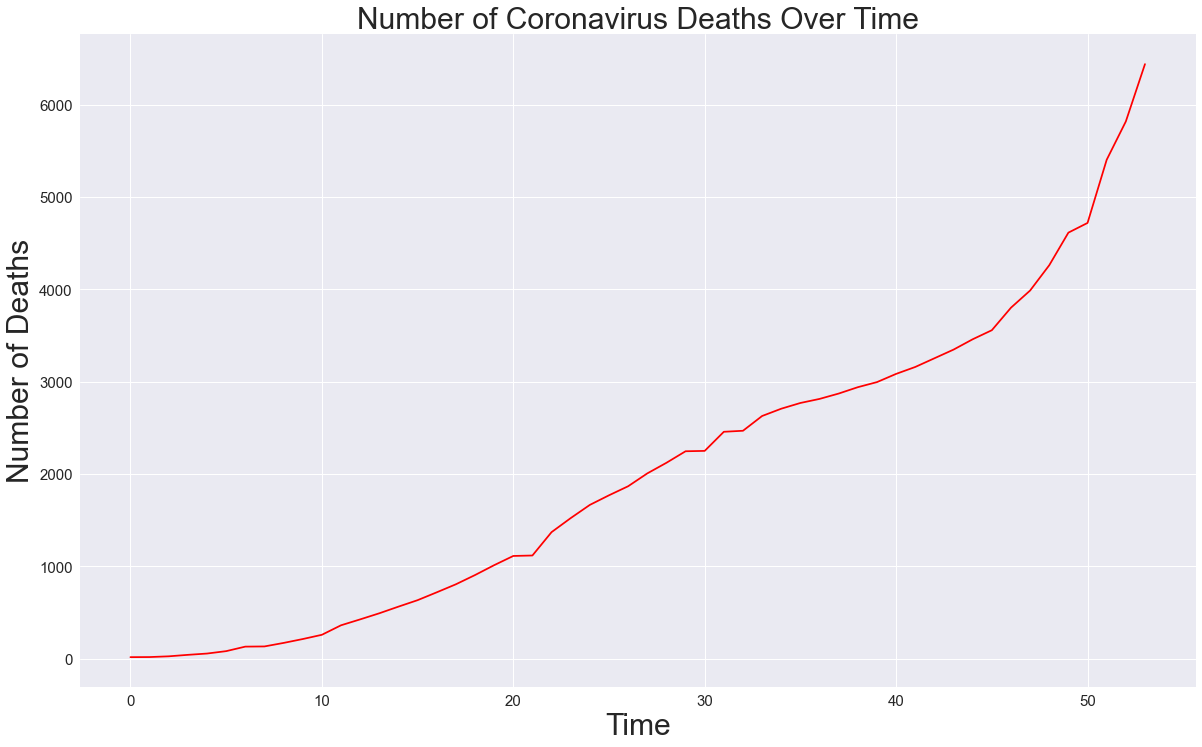

In [42]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("7.total deaths.png")
plt.show()

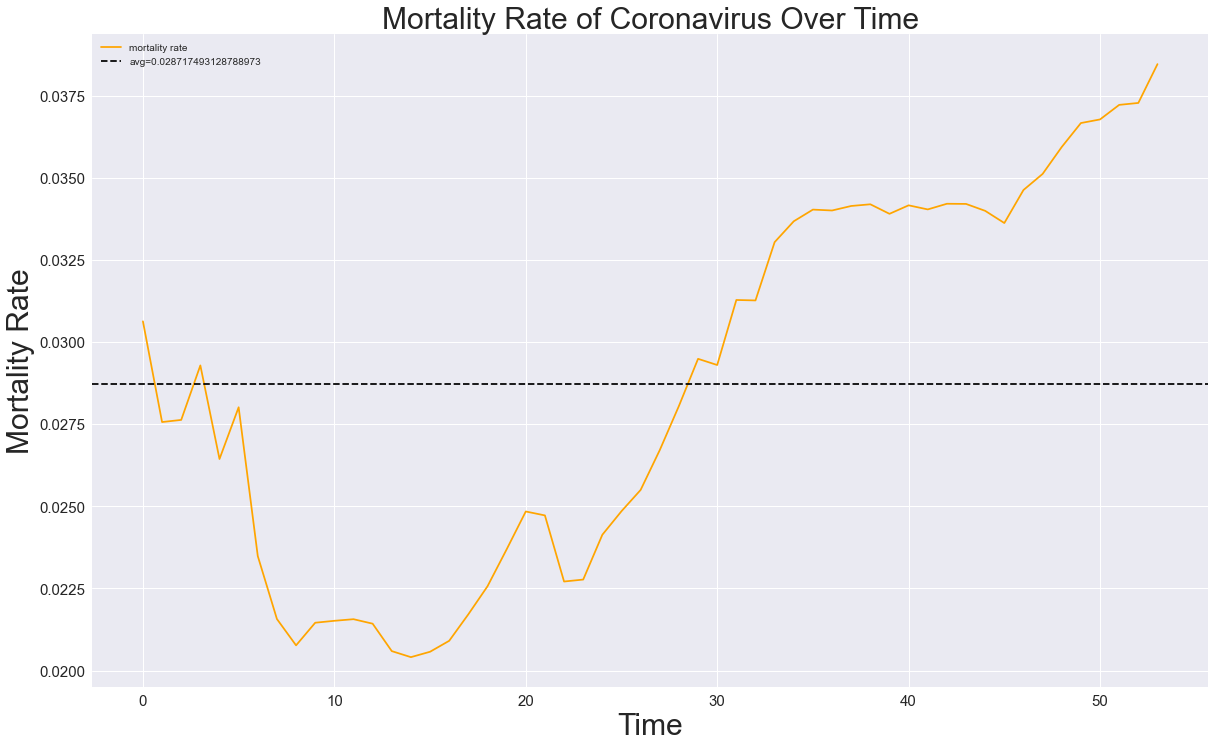

In [43]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'avg='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("8.mortality rate.png")
plt.show()


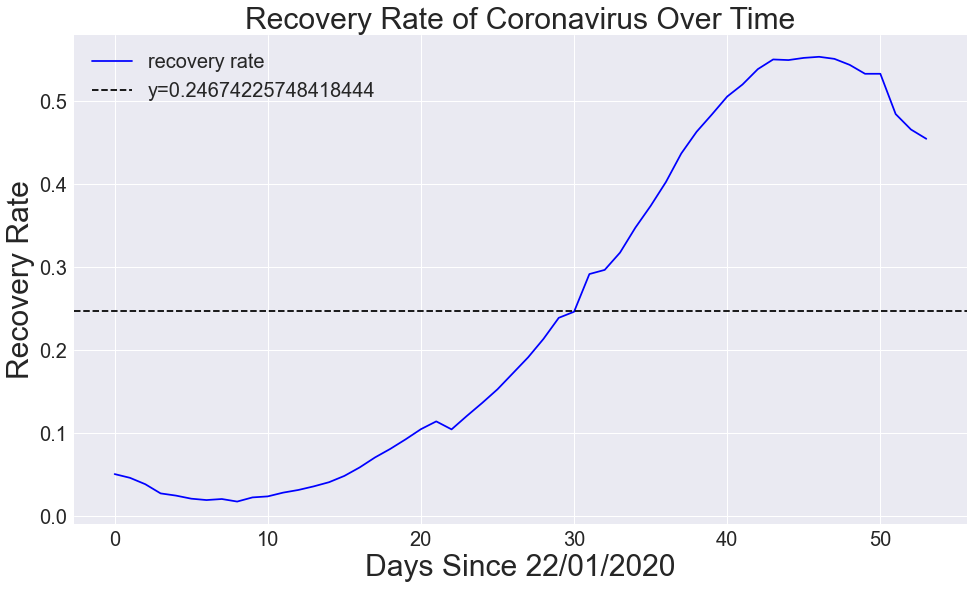

In [44]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("8.1 recovery_rate.png")
plt.show()

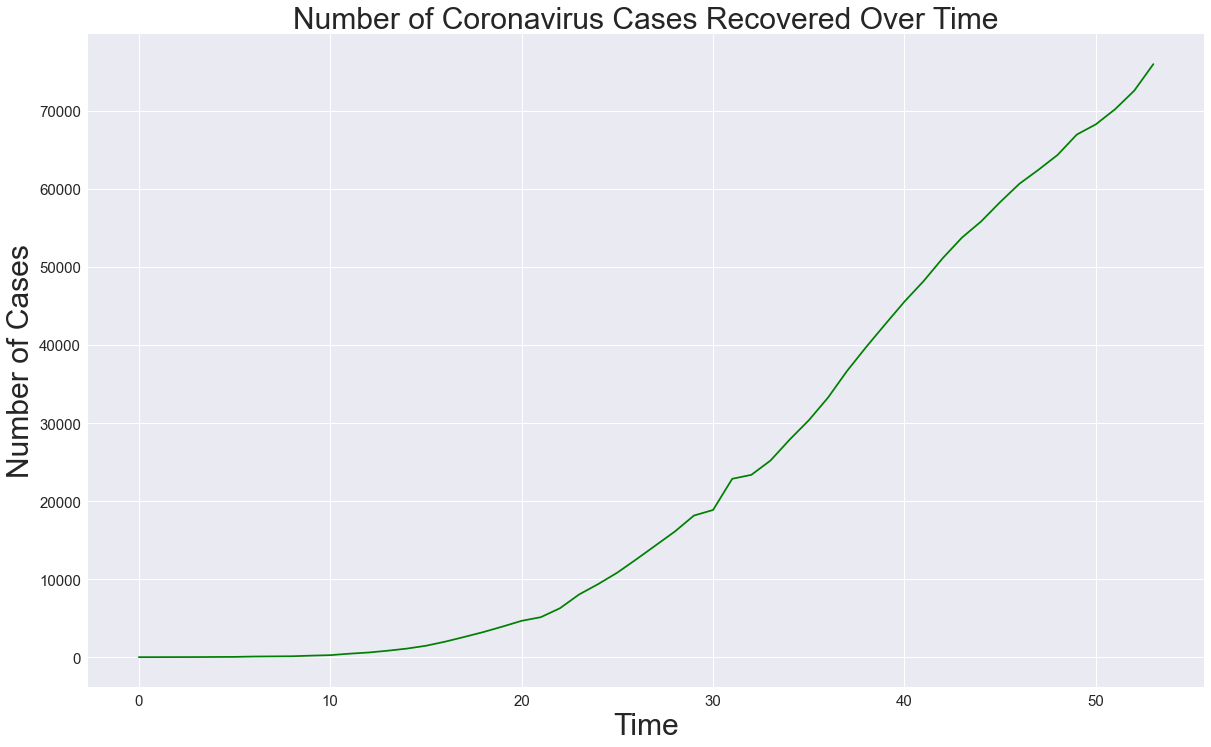

In [45]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("9.total recovered cases.png")
plt.show()

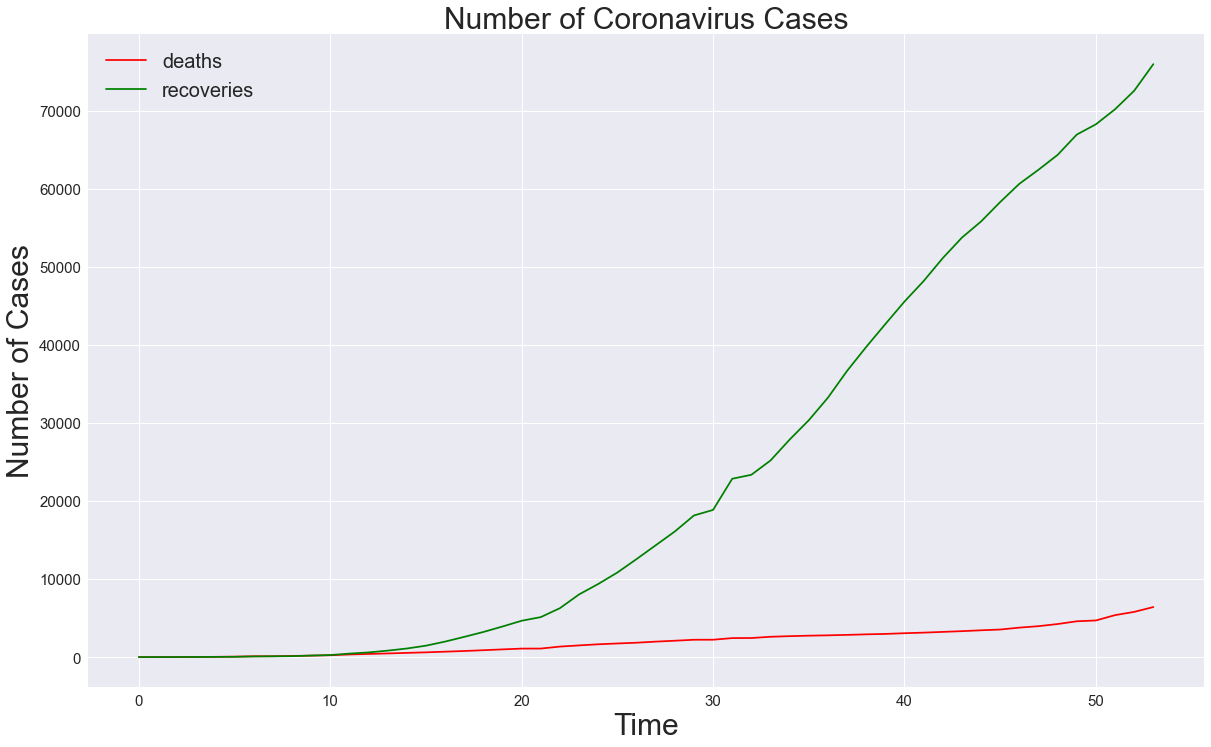

In [46]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("10.recovered vs death.png")
plt.show()

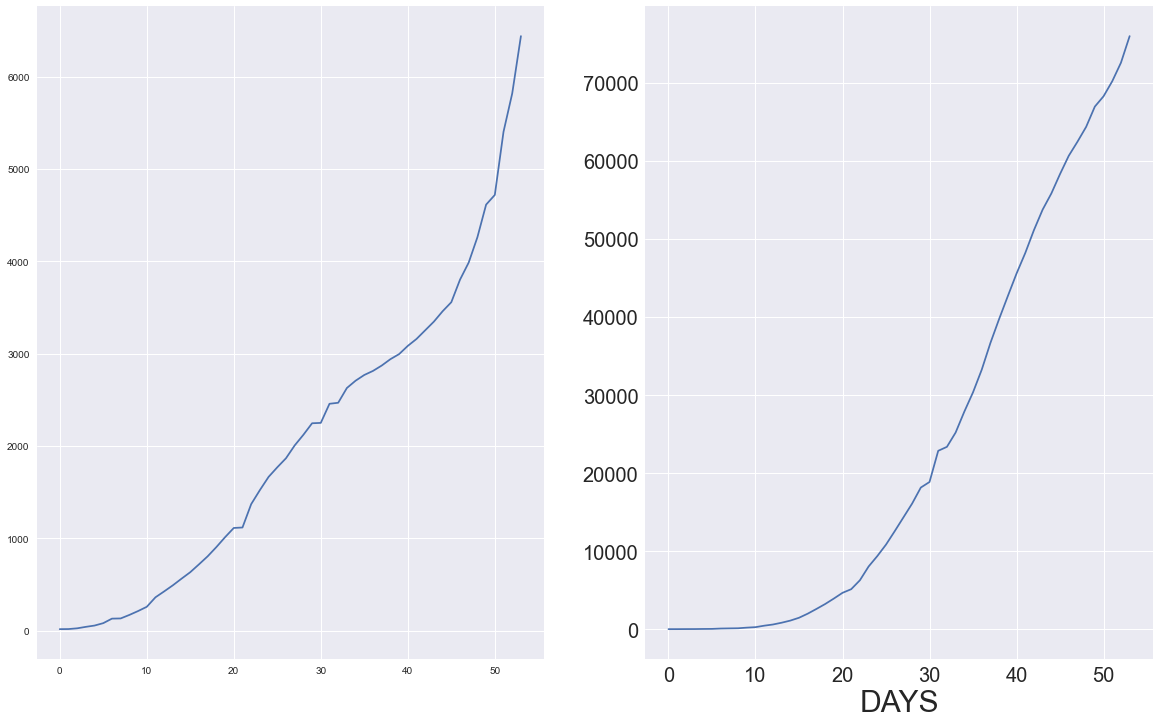

In [47]:
fig=plt.figure(figsize=(20, 12))
axes=fig.subplots(1,2,sharex=True)
axes[0].plot(adjusted_dates,total_deaths)
axes[1].plot(adjusted_dates,total_recovered)
plt.xlabel('DAYS', size=30)

plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("11.death vs recovered1.png")
plt.show()

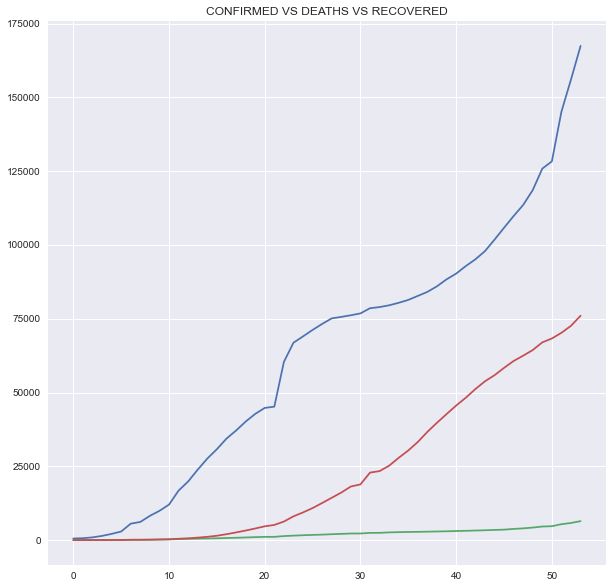

In [48]:
plt.figure(figsize=(10,10))
plt.plot(adjusted_dates,world_cases)
plt.plot(adjusted_dates,total_deaths)
plt.plot(adjusted_dates,total_recovered)
plt.title("CONFIRMED VS DEATHS VS RECOVERED")

plt.savefig("16.confirmed vs death vs recovered.png")

In [49]:
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed=train_test_split(days_since_22_1,world_cases,test_size=0.15,shuffle=False,random_state=0)

In [50]:
kernel=["poly","sigmoid","rbf"]
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   35.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [51]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'C': 0.01}

In [52]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)


In [53]:
svm_confirmed

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [54]:
svm_pred

array([ 30387.44440129,  30388.42185622,  30395.2640407 ,  30413.83568429,
        30450.00151654,  30509.62626702,  30598.57466527,  30722.71144085,
        30887.90132331,  31100.00904222,  31364.89932711,  31688.43690756,
        32076.48651311,  32534.91287332,  33069.58071775,  33686.35477594,
        34391.09977746,  35189.68045185,  36087.96152868,  37091.8077375 ,
        38207.08380786,  39439.65446933,  40795.38445144,  42280.13848376,
        43899.78129585,  45660.17761726,  47567.19217753,  49626.68970624,
        51844.53493293,  54226.59258716,  56778.72739848,  59506.80409644,
        62416.68741062,  65514.24207054,  68805.33280579,  72295.8243459 ,
        75991.58142043,  79898.46875894,  84022.35109098,  88369.09314611,
        92944.55965388,  97754.61534385, 102805.12494557, 108101.9531886 ,
       113650.96480248, 119458.02451679, 125528.99706107, 131869.74716488,
       138486.13955776, 145384.03896929, 152569.310129  , 160047.81776646,
       167825.42661123, 1

In [55]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
mse=mean_squared_error(svm_test_pred, y_test_confirmed)
rmse=math.sqrt(mse)
print("RMSE",rmse)


MAE: 16262.389241035278
RMSE 16872.717635432233


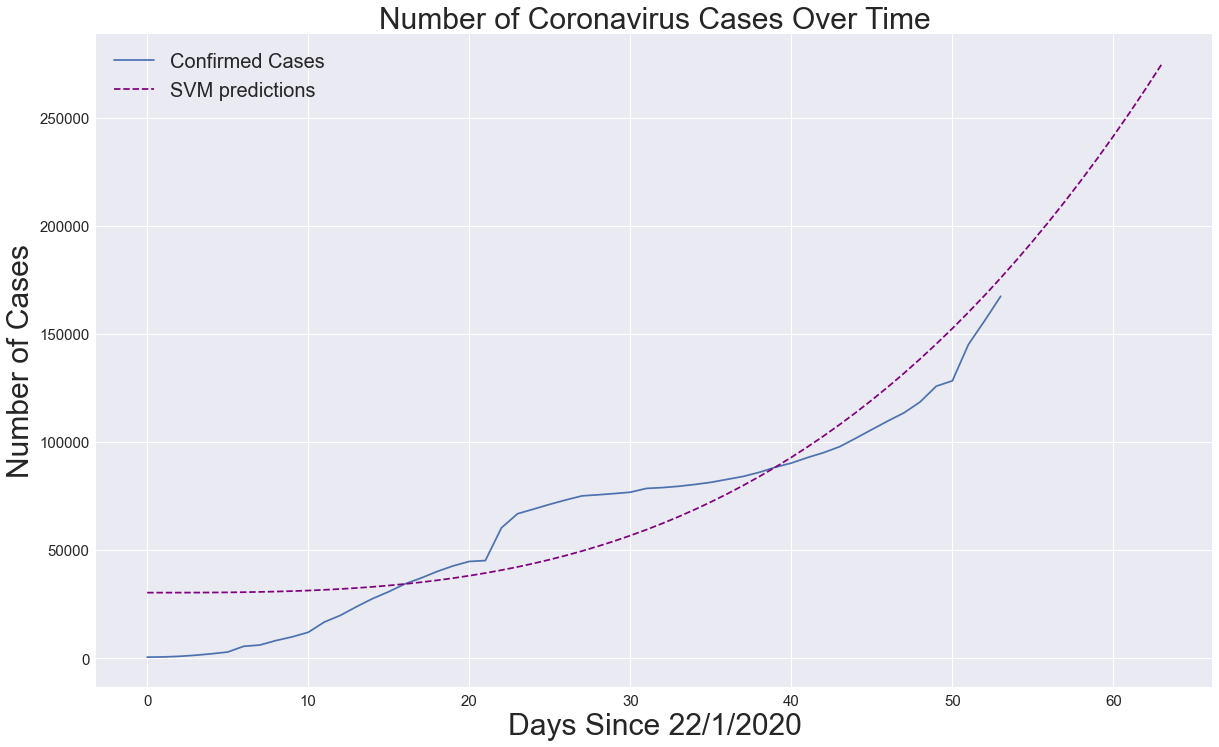

In [56]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 22/1/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'],fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("12.prediction vs actual world svm.png")
plt.show()

In [57]:
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('16/03/2020', 184301.40684087563),
 ('17/03/2020', 193011.5076848725),
 ('18/03/2020', 202044.16865439067),
 ('19/03/2020', 211405.2544789848),
 ('20/03/2020', 221100.62988820986),
 ('21/03/2020', 231136.15961162097),
 ('22/03/2020', 241517.708378773),
 ('23/03/2020', 252251.14091922113),
 ('24/03/2020', 263342.3219625192),
 ('25/03/2020', 274797.1162382235)}

In [58]:
#i implmented it as well as checked the accuracy
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
mse_linear=mean_squared_error(test_linear_pred, y_test_confirmed)
rmse_linear=math.sqrt(mse_linear)
print("RMSE",rmse_linear)

MAE: 11965.537037037033
RMSE 17549.82518462337


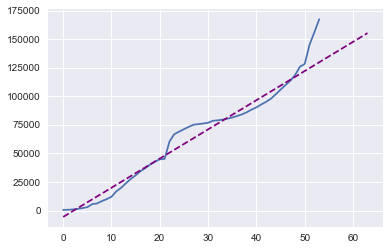

In [59]:
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='purple')
plt.savefig("13.prediction vs actual world.png")

In [60]:
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[132336.25252525]
 [134890.72222222]
 [137445.19191919]
 [139999.66161616]
 [142554.13131313]
 [145108.6010101 ]
 [147663.07070707]
 [150217.54040404]
 [152772.01010101]
 [155326.47979798]]


In [61]:
svm_pred[-10:]

array([184301.40684088, 193011.50768487, 202044.16865439, 211405.25447898,
       221100.62988821, 231136.15961162, 241517.70837877, 252251.14091922,
       263342.32196252, 274797.11623822])

In [62]:
l_pr=pd.DataFrame(linear_pred)

In [63]:
l_pr

,0
0,-5605.111111
1,-3050.641414
2,-496.171717
3,2058.297980
4,4612.767677
...,...
59,145108.601010
60,147663.070707
61,150217.540404
62,152772.010101


In [64]:
linear_pred

array([[ -5605.11111111],
       [ -3050.64141414],
       [  -496.17171717],
       [  2058.2979798 ],
       [  4612.76767677],
       [  7167.23737374],
       [  9721.70707071],
       [ 12276.17676768],
       [ 14830.64646465],
       [ 17385.11616162],
       [ 19939.58585859],
       [ 22494.05555556],
       [ 25048.52525253],
       [ 27602.99494949],
       [ 30157.46464646],
       [ 32711.93434343],
       [ 35266.4040404 ],
       [ 37820.87373737],
       [ 40375.34343434],
       [ 42929.81313131],
       [ 45484.28282828],
       [ 48038.75252525],
       [ 50593.22222222],
       [ 53147.69191919],
       [ 55702.16161616],
       [ 58256.63131313],
       [ 60811.1010101 ],
       [ 63365.57070707],
       [ 65920.04040404],
       [ 68474.51010101],
       [ 71028.97979798],
       [ 73583.44949495],
       [ 76137.91919192],
       [ 78692.38888889],
       [ 81246.85858586],
       [ 83801.32828283],
       [ 86355.7979798 ],
       [ 88910.26767677],
       [ 914